## **Prática do K-Means**

# Importando as Bibliotecas

In [44]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### **Chamando e Analisando a base Customers**

In [20]:
Base_Vendas = pd.read_csv('/content/Mall_Customers.csv')

In [22]:
Base_Vendas.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Chamando o Pandas Profiling**

In [23]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=80a54bfd04114546d55422c83dba9c65c852337dcd958ee792f15a8607d1d26d
  Stored in directory: /tmp/pip-ephem-wheel-cache-gp297etr/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [24]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(Base_Vendas, title='Relatorio - Pandas Profiling', html={'style':{'full_width':True}})

## **Gerando Relatorio Exploratorio com Pandas Profiling**



In [ ]:
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile.to_file(output_file='Kmeans.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Utilizando o Algoritmo K-Means sem a definição matematica de Centroides**

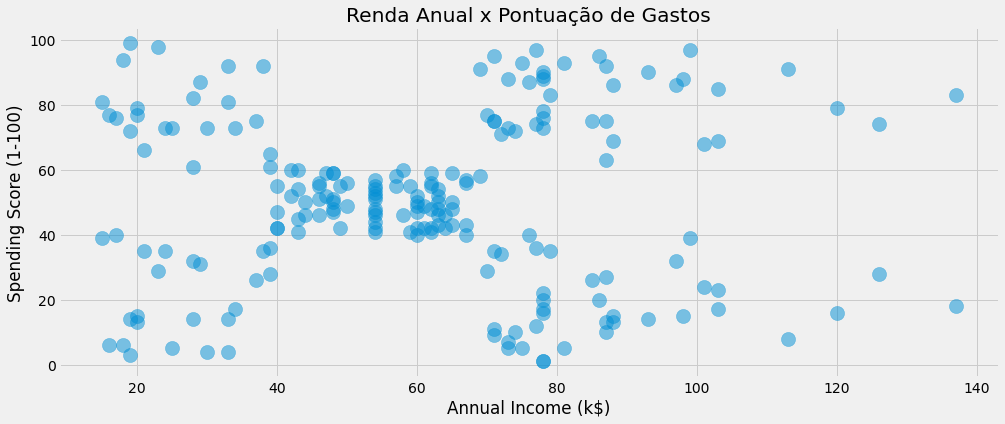

In [32]:
plt.style.use('fivethirtyeight') #tipo de grafico utilizado
plt.figure(1, figsize=[15,6]) #aumentando o tamanhao do grafico
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data= Base_Vendas, s=200, alpha=0.5 ) #plotando o grafico
plt.title('Renda Anual x Pontuação de Gastos') #titulo do grafico
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') #renomeando os eixos
plt.show() #mostando a plotagem do grafico

In [51]:
X2 = Base_Vendas[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values

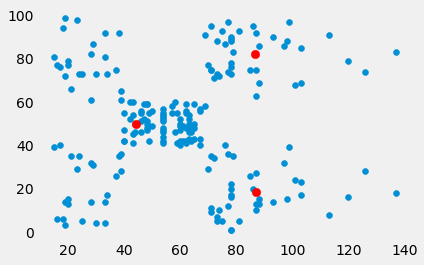

In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1])
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

## **Utilizando a Curva do Cotovelo para Definir o numero de Centroides**

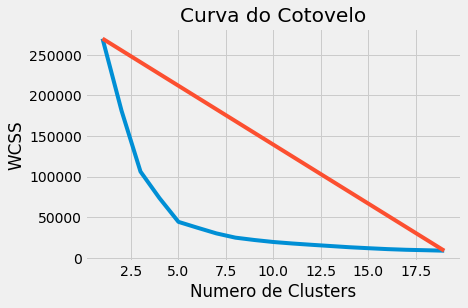

In [65]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Curva do Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

## **Plotagem do Resultado de Aplicação do K-Means com o numero correto de Centroides**

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
44448.45544793371


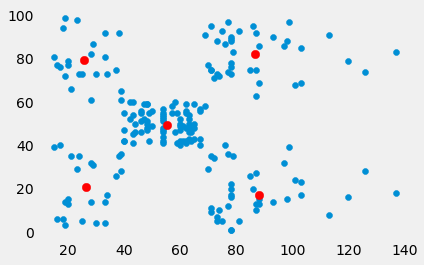

In [67]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

plt.scatter(X2[:,0], X2[:,1])
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

Elaborado e Desenvolvido por: Lucas Tayrone\
[LinkedIN](https://www.linkedin.com/in/lucastayrone/)